165
8000
whole milk 1327


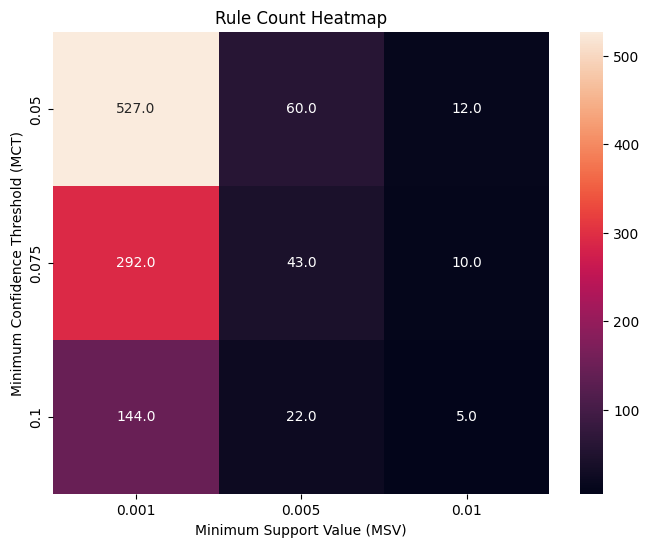

In [1]:
#1. [Association Rule Generation from Transaction Data]
import csv
import glob
from collections import Counter
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

transactions = []

with open(r'C:\Users\Scott\student_14_transaction\Grocery_Items_14.csv') as f:
    input_file = f

    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader, None)
    uniqueItems = set()
    itemCounts = Counter()

    row_count = 0
    
    for row in csv_reader:
        #for item in row:
        cleaned_items = [item.strip() for item in row if item.strip()]
        transactions.append(cleaned_items)
        uniqueItems.update(cleaned_items)
        itemCounts.update(cleaned_items)
        row_count = row_count+1
        
print(len(uniqueItems))
print(row_count)
maxItem = itemCounts.most_common(1)[0]
print(maxItem[0], maxItem[1])
#print(transactions)
#print(uniqueItems)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.08)
#print(rules)



frequent_itemsets001x05 = fpgrowth(df, min_support=0.001, use_colnames=True)
rules001x05 = association_rules(frequent_itemsets001x05, metric="confidence", min_threshold=0.05)
frequent_itemsets001x075 = fpgrowth(df, min_support=0.001, use_colnames=True)
rules001x075 = association_rules(frequent_itemsets001x075, metric="confidence", min_threshold=0.075)
frequent_itemsets001x1 = fpgrowth(df, min_support=0.001, use_colnames=True)
rules001x1 = association_rules(frequent_itemsets001x1, metric="confidence", min_threshold=0.1)

frequent_itemsets005x05 = fpgrowth(df, min_support=0.005, use_colnames=True)
rules005x05 = association_rules(frequent_itemsets005x05, metric="confidence", min_threshold=0.05)
frequent_itemsets005x075 = fpgrowth(df, min_support=0.005, use_colnames=True)
rules005x075 = association_rules(frequent_itemsets005x075, metric="confidence", min_threshold=0.075)
frequent_itemsets005x1 = fpgrowth(df, min_support=0.005, use_colnames=True)
rules005x1 = association_rules(frequent_itemsets005x1, metric="confidence", min_threshold=0.1)

frequent_itemsets01x05 = fpgrowth(df, min_support=0.01, use_colnames=True)
rules01x05 = association_rules(frequent_itemsets01x05, metric="confidence", min_threshold=0.05)
frequent_itemsets01x075 = fpgrowth(df, min_support=0.01, use_colnames=True)
rules01x075 = association_rules(frequent_itemsets01x075, metric="confidence", min_threshold=0.075)
frequent_itemsets01x1 = fpgrowth(df, min_support=0.01, use_colnames=True)
rules01x1 = association_rules(frequent_itemsets01x1, metric="confidence", min_threshold=0.1)

data = [
    {"MSV": 0.001, "MCT": 0.05, "Count": len(rules001x05)},
    {"MSV": 0.001, "MCT": 0.075, "Count": len(rules001x075)},
    {"MSV": 0.001, "MCT": 0.1, "Count": len(rules001x1)},
    {"MSV": 0.005, "MCT": 0.05, "Count": len(rules005x05)},
    {"MSV": 0.005, "MCT": 0.075, "Count": len(rules005x075)},
    {"MSV": 0.005, "MCT": 0.1, "Count": len(rules005x1)},
    {"MSV": 0.01, "MCT": 0.05, "Count": len(rules01x05)},
    {"MSV": 0.01, "MCT": 0.075, "Count": len(rules01x075)},
    {"MSV": 0.01, "MCT": 0.1, "Count": len(rules01x1)},
]

df_heatmap = pd.DataFrame(data)
pivot_table = df_heatmap.pivot(index="MCT", columns="MSV", values="Count")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f")
plt.title("Rule Count Heatmap")
plt.xlabel("Minimum Support Value (MSV)")
plt.ylabel("Minimum Confidence Threshold (MCT)")
plt.show()

x_train shape: (527, 128, 128, 3)
x_test shape: (132, 128, 128, 3)
527 train samples
132 test samples


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 4)           │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │          28,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,360 (114.69 KB)

 Trainable params: 29,360 (114.69 KB)

 Non-trainable params: 0 (0.00 B)

Number of training samples: 527
x_test shape: (132, 128, 128, 3)
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.2262 - loss: 1.3889 - val_accuracy: 0.3113 - val_loss: 1.3460
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3631 - loss: 1.3475 - val_accuracy: 0.2736 - val_loss: 1.3121
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3546 - loss: 1.2948 - val_accuracy: 0.3113 - val_loss: 1.2968
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3744 - loss: 1.2581 - val_accuracy: 0.2925 - val_loss: 1.2632
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3964 - loss: 1.2188 - val_accuracy: 0.3585 - val_loss: 1.2429
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4748 - loss: 1.1896 - val_accuracy: 0.3774 - val_loss: 1.2466
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4148 - loss: 1.1698 - val_accuracy: 0.3868 - val_loss: 1.2096
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy:

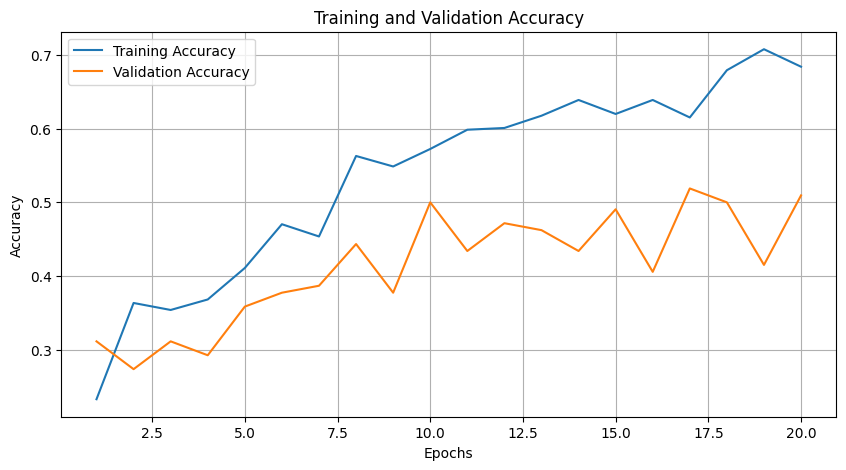

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 126, 126, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 4)           │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 3600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │          14,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,940 (58.36 KB)

 Trainable params: 14,940 (58.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.2776 - loss: 1.3869 - val_accuracy: 0.2925 - val_loss: 1.3837
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3572 - loss: 1.3765 - val_accuracy: 0.3774 - val_loss: 1.3802
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4018 - loss: 1.3694 - val_accuracy: 0.3491 - val_loss: 1.3765
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3831 - loss: 1.3568 - val_accuracy: 0.2925 - val_loss: 1.3665
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2477 - loss: 1.3470 - val_accuracy: 0.3208 - val_loss: 1.3557
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3268 - loss: 1.3309 - val_accuracy: 0.4057 - val_loss: 1.3581
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4519 - loss: 1.3254 - val_accuracy: 0.4151 - val_loss: 1.3457
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4550 - loss: 1.2905 - val_accuracy: 0.3396 - val_loss: 1.3286


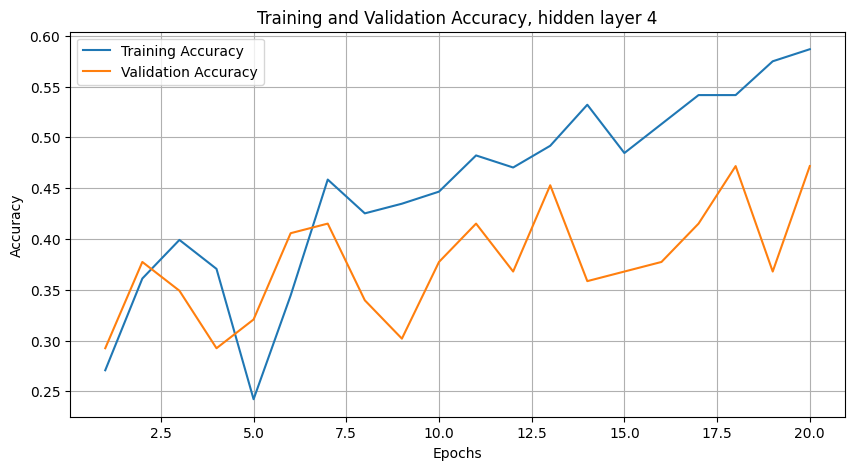

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 4)           │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 3600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │          57,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,200 (227.34 KB)

 Trainable params: 58,200 (227.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2854 - loss: 1.3970 - val_accuracy: 0.2547 - val_loss: 1.3621
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3273 - loss: 1.3373 - val_accuracy: 0.2830 - val_loss: 1.3476
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3572 - loss: 1.3249 - val_accuracy: 0.3396 - val_loss: 1.3077
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3847 - loss: 1.2788 - val_accuracy: 0.3302 - val_loss: 1.3387
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4461 - loss: 1.2400 - val_accuracy: 0.4623 - val_loss: 1.2553
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4804 - loss: 1.1857 - val_accuracy: 0.4528 - val_loss: 1.2096
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5312 - loss: 1.1188 - val_accuracy: 0.5094 - val_loss: 1.1717
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5771 - loss: 1.0607 - val_accuracy: 0.4717 - val_loss: 1.1937


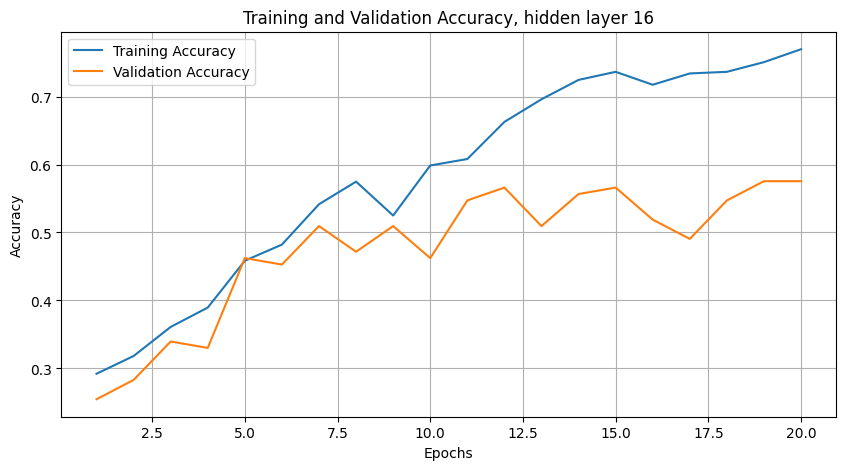

In [6]:
#2. [Image Classification Using CNN]
import numpy as np
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt

num_classes = 4
input_shape = (128, 128, 3)

def load_images(base_folder):
    images = []
    labels = []
    
    for breed_folder in glob.glob(os.path.join(base_folder, '*')):
        breed_name = os.path.basename(breed_folder)
        
        for image_path in glob.glob(os.path.join(breed_folder, '*-0.jpg')):
            img = Image.open(image_path)
            img_array = np.array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            labels.append(breed_name)
    
    return np.array(images), np.array(labels)

x_train, y_train = load_images('./stanford-dogs-dataset/images/Images')
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test_encoded, num_classes=4)

#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(8, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(4, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(8, activation="relu"), #change this for c) to 4 and 16
        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

batch_size = 128
epochs = 20

image_paths = glob.glob(os.path.join('./stanford-dogs-dataset/images/Images', '*-0.jpg'))

print(f"Number of training samples: {len(x_train)}")
print("x_test shape:", x_test.shape)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
values = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

epochs = range(1, len(values.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, values.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, values.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#last digit 9, c. 4:
epochs = 20
model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(8, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(4, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(4, activation="relu"), #change this for c) to 4 and 16
        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
values = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

epochs = range(1, len(values.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, values.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, values.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy, hidden layer 4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#last digit 9, c. 16:
epochs = 20
model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(8, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(4, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(16, activation="relu"), #change this for c) to 4 and 16
        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
values = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

epochs = range(1, len(values.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, values.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, values.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy, hidden layer 16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
print("In review, as you increase the hidden layer from 4, to 8, to 16, not only does the accuracy improve, \
but the fit of the model seems to go from slightly underfit to even slightly less underfit, and loser to something \
that would appear just right as the validation accuracy becomes more and more identical to the training accuracy.")

In review, as you increase the hidden layer from 4, to 8, to 16, not only does the accuracy improve, but the fit of the model seems to go from slightly underfit to even slightly less underfit, and loser to something that would appear just right as the validation accuracy becomes more and more identical to the training accuracy.


In [8]:
#3. [Text Classification by fine-tuning LLM model]
from datasets import load_dataset
import os
from transformers import AutoTokenizer
import numpy as np
import torch
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction

data = load_dataset('./student_14/')
data

labels = [label for label in data['train'].features.keys() if label not in ['ID', 'Tweet']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
    text = examples["Tweet"]
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
    labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
    labels_matrix = np.zeros((len(text), len(labels)))
    for idx, label in enumerate(labels):
        labels_matrix[:, idx] = labels_batch[label]

    encoding["labels"] = labels_matrix.tolist()
    return encoding

encoded_data = data.map(preprocess_data, batched=True, remove_columns=data['train'].column_names)
example = encoded_data['train'][0]
print(example.keys())
tokenizer.decode(example['input_ids'])
example['labels']
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]
encoded_data.set_format("torch")

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

batch_size = 8
metric_name = "f1"

args = TrainingArguments(f"bert-finetuned-semi_eval-english",
                         evaluation_strategy = "epoch",
                         save_strategy = "epoch",
                         learning_rate=2e-5,
                         per_device_train_batch_size=batch_size,
                         per_device_eval_batch_size=batch_size,
                         num_train_epochs=5,
                         weight_decay=0.01,
                         load_best_model_at_end=True,
                         metric_for_best_model=metric_name,)

def multi_label_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)
    metrics = {'f1': f1_micro_average,
    'roc_auc': roc_auc,
    'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    result = multi_label_metrics(predictions = preds, labels = p.label_ids)
    return result

encoded_data['train'][0]['labels'].type()
encoded_data['train']['input_ids'][0]
outputs = model(input_ids=encoded_data['train']['input_ids'][0].unsqueeze(0), labels=encoded_data['train'][0]['labels'].unsqueeze(0))
outputs

trainer = Trainer(model, args, train_dataset=encoded_data["train"], eval_dataset=encoded_data["validation"], tokenizer=tokenizer,
                  compute_metrics=compute_metrics)
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


C:\Users\Scott\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\Scott\AppData\Local\Temp\ipykernel_8456\2808367754.py:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=encoded_data["train"], eval_dataset=encoded_data["validation"], tokenizer=tokenizer,


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,No log,0.345442,0.625535,0.741590,0.220000
2,0.393800,0.323948,0.669773,0.771654,0.250000
3,0.283500,0.330725,0.675526,0.781866,0.262500
4,0.239900,0.324730,0.679245,0.783773,0.272500
5,0.239900,0.325462,0.680663,0.785256,0.282500


TrainOutput(global_step=1875, training_loss=0.2875029296875, metrics={'train_runtime': 3279.0433, 'train_samples_per_second': 4.575, 'train_steps_per_second': 0.572, 'total_flos': 986746187520000.0, 'train_loss': 0.2875029296875, 'epoch': 5.0})

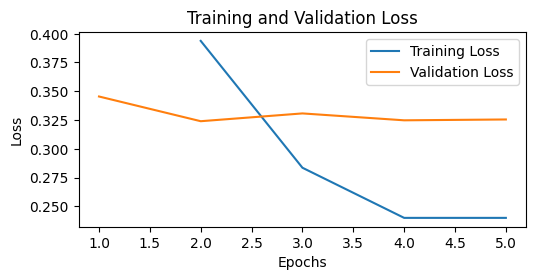

In [19]:
#3 continued
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]
train_loss = [None, 0.3938, 0.2835, 0.2399, 0.2399]
val_loss = [0.345442, 0.323948, 0.330725, 0.324730, 0.325462]
f1_scores = [0.625535, 0.669773, 0.675526, 0.679245, 0.680663]
roc_auc_scores = [0.741590, 0.771654, 0.781866, 0.783773, 0.785256]
accuracy_scores = [0.220000, 0.250000, 0.262500, 0.272500, 0.282500]

train_epochs = list(range(1, len(train_loss) + 1))
eval_epochs = list(range(1, len(val_loss) + 1))

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(epochs[1:], train_loss[1:], label='Training Loss')  # Start from index 1 to skip None
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [20]:
trainer.evaluate()

{'eval_loss': 0.3254620432853699,
 'eval_f1': 0.6806629834254143,
 'eval_roc_auc': 0.7852564102564101,
 'eval_accuracy': 0.2825,
 'eval_runtime': 21.0637,
 'eval_samples_per_second': 18.99,
 'eval_steps_per_second': 2.374,
 'epoch': 5.0}

In [21]:
print("The accuracy is .2825")

The accuracy is .2825


In [6]:
#3 continued, modified so that prediction is true if 1 label matches
from datasets import load_dataset
import os
from transformers import AutoTokenizer
import numpy as np
import torch
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction

data = load_dataset('./student_14/')
data

labels = [label for label in data['train'].features.keys() if label not in ['ID', 'Tweet']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
    text = examples["Tweet"]
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
    labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
    labels_matrix = np.zeros((len(text), len(labels)))
    for idx, label in enumerate(labels):
        labels_matrix[:, idx] = labels_batch[label]

    encoding["labels"] = labels_matrix.tolist()
    return encoding

encoded_data = data.map(preprocess_data, batched=True, remove_columns=data['train'].column_names)
example = encoded_data['train'][0]
print(example.keys())
tokenizer.decode(example['input_ids'])
example['labels']
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]
encoded_data.set_format("torch")

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

batch_size = 8
metric_name = "f1"

args = TrainingArguments(f"bert-finetuned-semi_eval-english",
                         evaluation_strategy = "epoch",
                         save_strategy = "epoch",
                         learning_rate=2e-5,
                         per_device_train_batch_size=batch_size,
                         per_device_eval_batch_size=batch_size,
                         num_train_epochs=5,
                         weight_decay=0.01,
                         load_best_model_at_end=True,
                         metric_for_best_model=metric_name,)

def multi_label_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)
    metrics = {'f1': f1_micro_average,
    'roc_auc': roc_auc,
    'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    labels = p.label_ids
    preds = 1 / (1 + np.exp(-preds))
    preds = (preds > 0.5).astype(int)
    accuracy = np.mean(np.any(preds == labels, axis=1))
    return {
        'accuracy': accuracy
    }

encoded_data['train'][0]['labels'].type()
encoded_data['train']['input_ids'][0]
outputs = model(input_ids=encoded_data['train']['input_ids'][0].unsqueeze(0), labels=encoded_data['train'][0]['labels'].unsqueeze(0))
outputs

trainer = Trainer(model, args, train_dataset=encoded_data["train"], eval_dataset=encoded_data["validation"], tokenizer=tokenizer,
                  compute_metrics=compute_metrics)
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


C:\Users\Scott\AppData\Local\Temp\ipykernel_11084\832002018.py:90: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=encoded_data["train"], eval_dataset=encoded_data["validation"], tokenizer=tokenizer,


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.345442,1.000000


KeyError: "The `metric_for_best_model` training argument is set to 'eval_f1', which is not found in the evaluation metrics. The available evaluation metrics are: ['eval_loss', 'eval_accuracy']. Please ensure that the `compute_metrics` function returns a dictionary that includes 'eval_f1' or consider changing the `metric_for_best_model` via the TrainingArguments."

In [26]:
text = "I'm happy about this"

encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}
outputs = trainer.model(**encoding)

logits = outputs.logits
logits.shape

sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= .5)] = 1
predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label==1.0]
print(predicted_labels)

['joy', 'optimism']
